# plot_decision_regions

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')

# Zadanie

##1. Rozdziel zestaw danych na podzbiory uczący i testowy,

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [1,2]]
y = iris.target

##2. Sprawdź działanie drzewa dla entropii i współczynnika Giniego - porównaj wyniki i uargumentuj rezultaty. 
Przykład tworzenia drzewa decyzyjnego znajduje się poniżej.
Dokumentacja klasy którą można wykorzystać do kostrukcji drzewa decyzyjnego znajduję się w linku poniżej.

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

9
17
0.9866666666666667


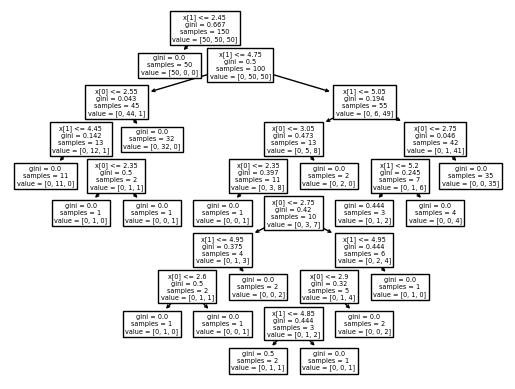

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier() # Uzupełnić parametry konstruktora
clf = clf.fit(X, y)
tree.plot_tree(clf)
print(clf.get_depth())
print(clf.get_n_leaves())
print(clf.score(X,y)) 
plt.show()
# ten classifier nie jest nigdy wyższy od 0.5

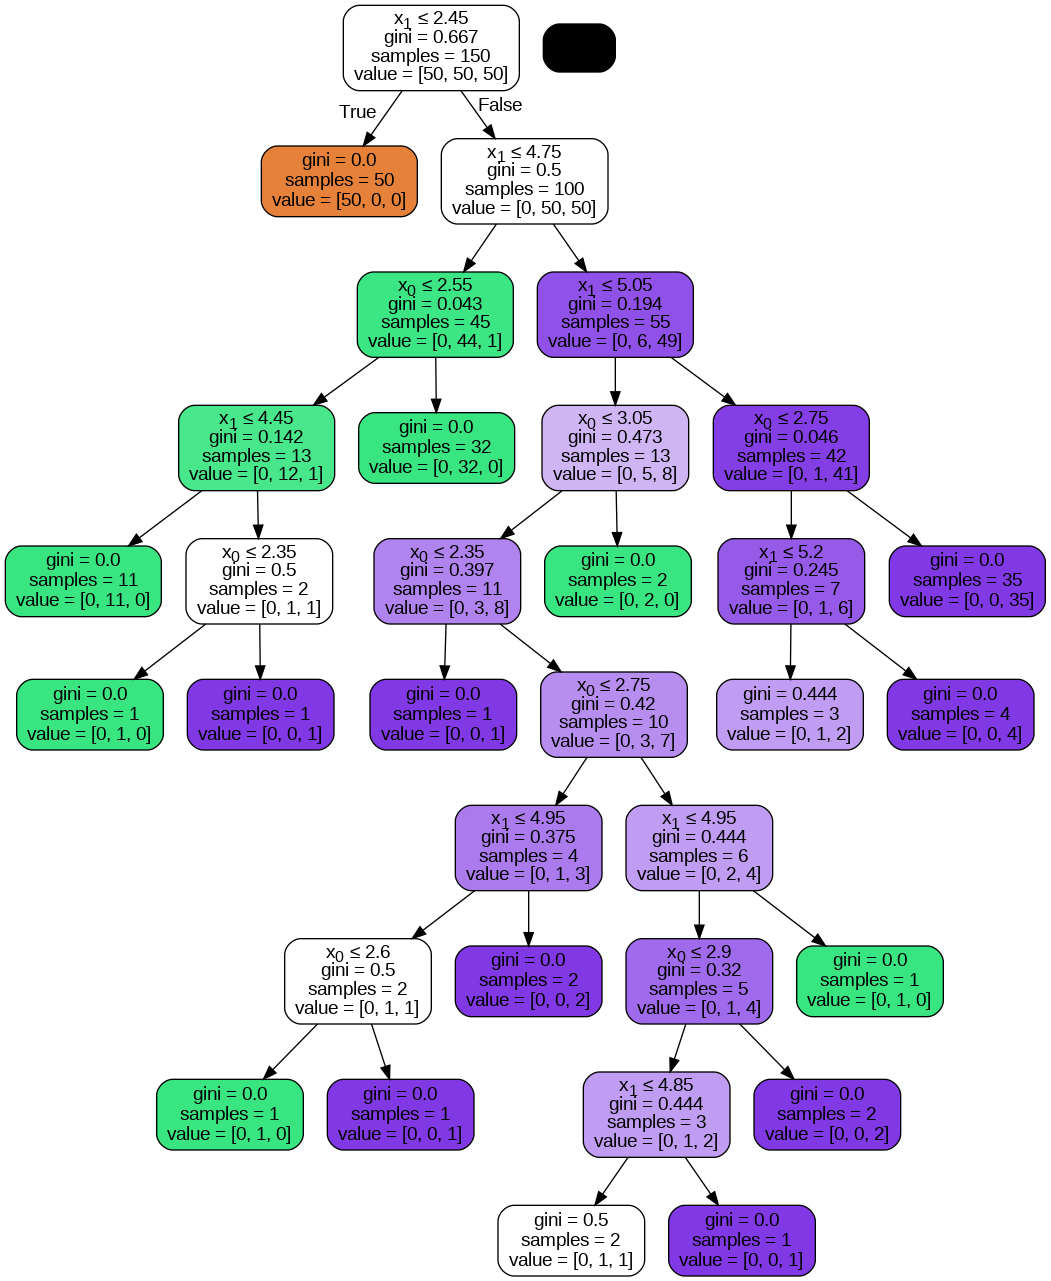

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dat = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dat)  
graph.write_png('diabetes.png')
Image(graph.create_png())

8
15
0.9866666666666667


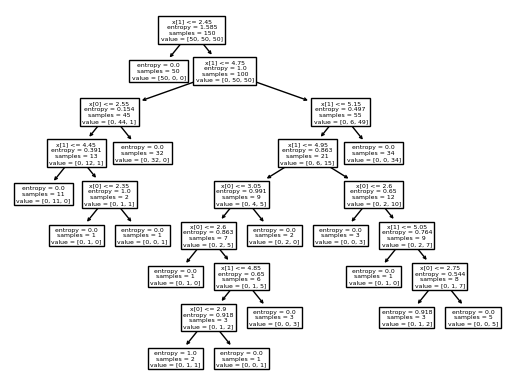

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy") # Uzupełnić parametry konstruktora
clf = clf.fit(X, y)
tree.plot_tree(clf) 
print(clf.get_depth())
print(clf.get_n_leaves())
print(clf.score(X,y))
plt.show()
# ten classifier może być maksymalnie równy 1, z tego powodu jest mniejszy od giniego (kończy szybciej bo jest mniej "wybiórczy". w tym wypadku niewiele zmienia to jego skuteczność)

<ipython-input-1-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


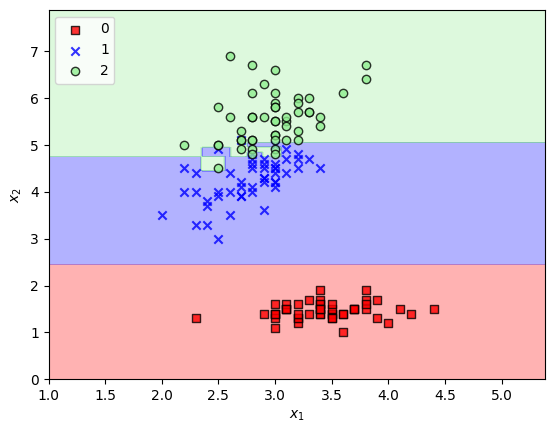

In [ ]:
plot_decision_regions(X=X, y=y, classifier=clf)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

##3. Sprawdź działanie drzewa dla różnych głębokości drzewa - porównaj wyniki i uargumentuj rezultaty,

In [1]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5) # Uzupełnić parametry konstruktora
clf = clf.fit(X, y)
tree.plot_tree(clf) 
print(clf.get_depth())
print(clf.get_n_leaves())
print(clf.score(X,y))
plt.show()
# jak widać wydłużenie drzewa na siłe w zasadzie nie działa. Natomiast zmniejszenie maksymalnej głębokości powinno ją obniżać (nie robi tego zawsze więc jak jest potrzeba redukcji gł można poeksperymentować).
# jest to bardzo zależne od ilości klas

NameError: ignored

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dat = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dat)  
graph.write_png('diabetes.png')
Image(graph.create_png())

##4. Sprawdź działanie lasów losowych dla różnej liczby drzew decyzyjnych - porównaj wyniki i uargumentuj rezultaty.

# Program

0.9866666666666667


<ipython-input-6-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-6-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


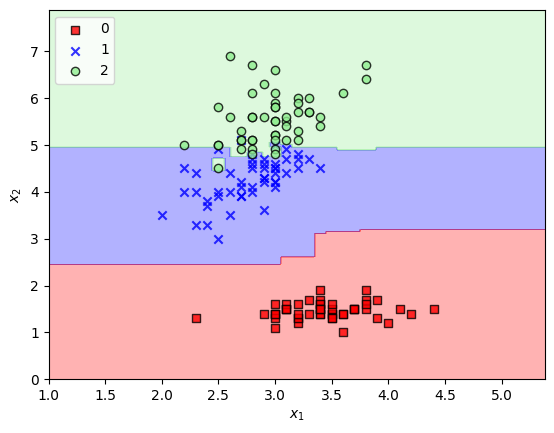

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=35)
clf = clf.fit(X, y)
print(clf.score(X,y))
plot_decision_regions(X=X, y=y, classifier=clf)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()
#  z tego co zauważyłem, wystarczy koło 35 drzew żeby osiągnąć maksymalną skuteczność. Zakładam, że jest tak głównie dlatego, że nie ma dużo danych, przez co dokładność szybko osiąga swój peak